### Web Scraping with temp function

In [61]:
import pandas as pd 
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url = 'https://fangj.github.io/friends/'
res = requests.get(url)

In [3]:
soup = BeautifulSoup(res.content)

In [4]:
links = soup.find_all('a')

In [6]:
a_script =[]
cc=0
script_dict ={}
for l in links:
    st = l.get_text().split(' ')
    if(len(st[0].strip())>=4):
        season = int(st[0][0:2])
        episode = st[0][2:]
    else:
        season = int(st[0][0])
        episode = st[0][1:]
    title = ' '.join(st[1:]).strip()
    surl = url + l['href']
    s_episode = requests.get(surl)
    soup = BeautifulSoup(s_episode.text, 'html.parser')
    dialogues = soup.find_all('p')
    script_start = False
    for d in dialogues:
        diag = d.get_text()
        diag = diag.split(':')
        if(script_start):
            if(len(diag)>1):
                if(diag[0]=='[Scene'):
                    continue
                else:
                    a_script.append([season, episode, title, diag[0],diag[1]])
        elif(len(diag)>1 and diag[0]=='[Scene'):
            script_start = True
    script_dict.update({cc: a_script[cc]})
    cc = cc+1

In [7]:
friends_df = pd.DataFrame(a_script)

In [8]:
friends_df.head()

,0,1,2,3,4
0,1,01,Monica Gets A Roommate,Phoebe,"(singing) Love is sweet as\nsummer showers, l..."
1,1,01,Monica Gets A Roommate,Ross,(squatting and reading the instructions) I'm\...
2,1,01,Monica Gets A Roommate,Joey,I'm thinking we've got a\nbookcase here.
3,1,01,Monica Gets A Roommate,Chandler,It's a beautiful thing.
4,1,01,Monica Gets A Roommate,Joey,(picking up a leftover part) What's this?


In [9]:
friends_df.rename(columns={0: 'season',
                  1: 'episode',
                  2: 'title',
                  3: 'character',
                  4: 'dialogue'}, inplace=True)

In [10]:
friends_df.head()

,season,episode,title,character,dialogue
0,1,01,Monica Gets A Roommate,Phoebe,"(singing) Love is sweet as\nsummer showers, l..."
1,1,01,Monica Gets A Roommate,Ross,(squatting and reading the instructions) I'm\...
2,1,01,Monica Gets A Roommate,Joey,I'm thinking we've got a\nbookcase here.
3,1,01,Monica Gets A Roommate,Chandler,It's a beautiful thing.
4,1,01,Monica Gets A Roommate,Joey,(picking up a leftover part) What's this?


In [11]:
friends_df.shape

(55727, 5)

In [14]:
#friends_df.to_csv('friends.csv', index=False)

In [13]:
friends_df['character'].unique()

array(['Phoebe', 'Ross', 'Joey', 'Chandler', 'Monica', 'Paul', 'Rachel',
       'Priest on TV', 'All', 'Frannie', 'Ross and Rachel', 'Customer',
       'Marsha', 'Carol', 'Chandler and Joey', 'Mrs. Geller',
       'Mr. Geller', 'Susan', 'Barry', 'Robbie', 'Bernice', 'Dr. Oberman',
       'Paula', 'Alan', 'The Guys', 'Lizzie', 'Guys', 'Leslie', 'Kiki',
       'Joanne', 'Receptionist', 'Pizza Guy', 'Monica and Phoebe', 'Both',
       'Kid', 'Angela', 'Janice', 'Woman', 'Bob', 'Aurora', 'Director',
       'Jill', 'Monica, Joey, and Phoebe', 'Mr. Heckles', 'Paolo',
       'Aunt Lillian', 'Nurse', 'Shelley', 'Andrea', 'Lowell', 'Terry',
       'Guy', 'Girl',
       '(Joey turns around and sees his face on a poster in the subway. The poster says',
       'Max', 'David', 'Sandy', 'Fun Bobby', 'Dick Clark', 'Jay Leno',
       'Mrs. Bing', 'Coma Guy', 'Joey, Chandler, and Ross',
       'Carol and Susan', "Phoebe's Assistant", 'Joey and Chandler',
       'Rachel and Phoebe', 'Girls', 'Roger', 'M

In [16]:
#lowercasing all the characters to have each character 
friends_df['character'] = friends_df['character'].str.lower()

In [17]:
friends_df['character'].unique()

array(['phoebe', 'ross', 'joey', 'chandler', 'monica', 'paul', 'rachel',
       'priest on tv', 'all', 'frannie', 'ross and rachel', 'customer',
       'marsha', 'carol', 'chandler and joey', 'mrs. geller',
       'mr. geller', 'susan', 'barry', 'robbie', 'bernice', 'dr. oberman',
       'paula', 'alan', 'the guys', 'lizzie', 'guys', 'leslie', 'kiki',
       'joanne', 'receptionist', 'pizza guy', 'monica and phoebe', 'both',
       'kid', 'angela', 'janice', 'woman', 'bob', 'aurora', 'director',
       'jill', 'monica, joey, and phoebe', 'mr. heckles', 'paolo',
       'aunt lillian', 'nurse', 'shelley', 'andrea', 'lowell', 'terry',
       'guy', 'girl',
       '(joey turns around and sees his face on a poster in the subway. the poster says',
       'max', 'david', 'sandy', 'fun bobby', 'dick clark', 'jay leno',
       'mrs. bing', 'coma guy', 'joey, chandler, and ross',
       'carol and susan', "phoebe's assistant", 'joey and chandler',
       'rachel and phoebe', 'girls', 'roger', 'm

In [88]:
#main_cast = friends_df[friends_df['character'] is in ['phoebe', 'ross', 'joey', 'chandler', 'monica', 'rachel']]
main_characters = ['phoebe', 'ross', 'joey', 'chandler', 'monica', 'rachel']
main_cast = friends_df[friends_df['character'].isin(main_characters)].copy()

In [89]:
main_cast.head()

,season,episode,title,character,dialogue
0,1,01,Monica Gets A Roommate,phoebe,"(singing) Love is sweet as\nsummer showers, l..."
1,1,01,Monica Gets A Roommate,ross,(squatting and reading the instructions) I'm\...
2,1,01,Monica Gets A Roommate,joey,I'm thinking we've got a\nbookcase here.
3,1,01,Monica Gets A Roommate,chandler,It's a beautiful thing.
4,1,01,Monica Gets A Roommate,joey,(picking up a leftover part) What's this?


In [90]:
main_cast['character'].unique()

array(['phoebe', 'ross', 'joey', 'chandler', 'monica', 'rachel'],
      dtype=object)

In [91]:
main_cast['season'].unique()

array([ 1,  2,  3,  4,  5,  6, 61,  7,  8,  9, 92, 10])

In [92]:
#Seems like web-scraping the pages might have resulted in some wrong data, so I will replace 61 and 92 with its corresponding 
main_cast['season'].replace([61, 92], [6,9], inplace=True)

In [98]:
#seeing how many times the character appears 
main_cast['character'].value_counts()

rachel      8380
ross        8276
chandler    7577
monica      7539
joey        7478
phoebe      6728
Name: character, dtype: int64

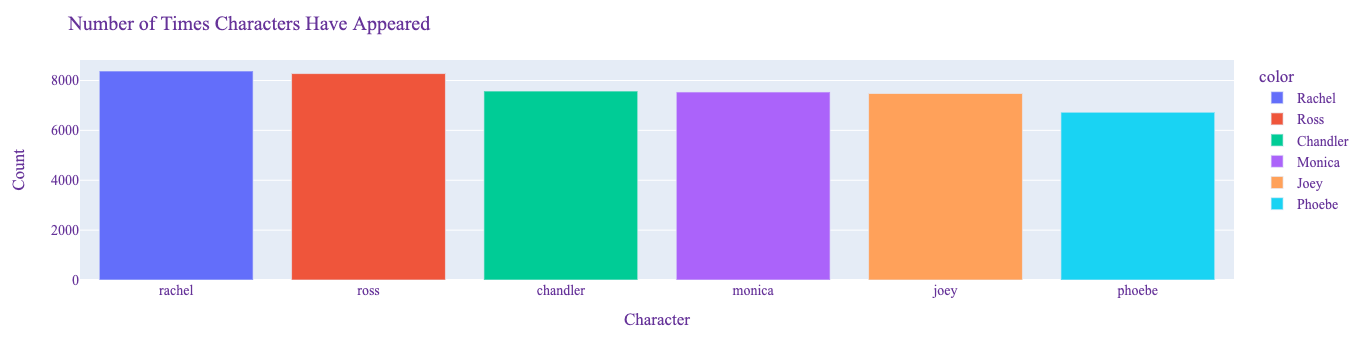

In [97]:
fig = px.bar(main_cast['character'].value_counts().sort_values(ascending=False), 
             color=main_cast['character'].value_counts().sort_values(ascending=False).index.str.title())
fig.update_layout(
    title="Number of Times Characters Have Appeared",
    xaxis_title="Character",
    yaxis_title="Count",
    legend_title="color",
    font=dict(
        family="Times New Roman, monospace",
        size=14,
        color="RebeccaPurple"
))
fig.show()